## Exploratory Data Analysis & Data Visualization

### About Dataset:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

This data set has the information on the passengers and whether they survived or not.

You can find the dataset at [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset) and [here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv) as well.

**Additional Information about vairables:**

| Variable   |	Definition   |
 |:------|:--------------------------------|
 |survived | survived? 0 = No, 1 = yes  |
 |pclass | Ticket class (int)  |
 |sex	 |sex |
 |age	 | age in years  |
 |sibsp  |	# of siblings / spouses aboard the Titanic |
 |parch  |	# of parents / children aboard the Titanic |
 |fare   |	Passenger fare   |
 |embarked | Port of Embarkation |
 |class  |Ticket class (obj)   |
 |who    | man, woman, or child  |
 |adult_male | True/False |
 |alive  | yes/no  |
 |alone  | yes/no  |


### Objective

To load and clean the data, fix the missing values and do Exploratory Data Analysis to get descriptive statistics and know more about the features. 

And to visualize the correlation and other information about the features.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')

#### Loading the dataset

In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Let us see statistics of the numeric features.

In [4]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing Values**

In [5]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

`deck` has nearly 70% of its data missing, which make any kind of imputation less reliable, so let's drop it.

In [6]:
titanic_df.drop('deck', axis=1,inplace=True)

For `age` we will fill the missing data with the median age.

For `embarked` and `embark_town` we will replace the missing values with the most frequent variable.

In [7]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())

In [8]:
titanic_df['embarked'] = titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

titanic_df['embark_town'] = titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0])

In [9]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Now, we have no missing values.

### Data Visualization

**Correlation**

In [10]:
titanic_df.corr(numeric_only = True)['survived'].drop('survived').sort_values(ascending=False)

fare          0.257307
parch         0.081629
sibsp        -0.035322
age          -0.064910
alone        -0.203367
pclass       -0.338481
adult_male   -0.557080
Name: survived, dtype: float64

Fare has high positive correlation which indicates the higher the fare, higher the chance of survival(correlation, not causation).

While adult_male has high negative correlation, which indicated if you're an adult male your chance of surviving is less, it makes sense as the protocol is children and women first.

Text(0.5, 1.0, 'Correlation Table')

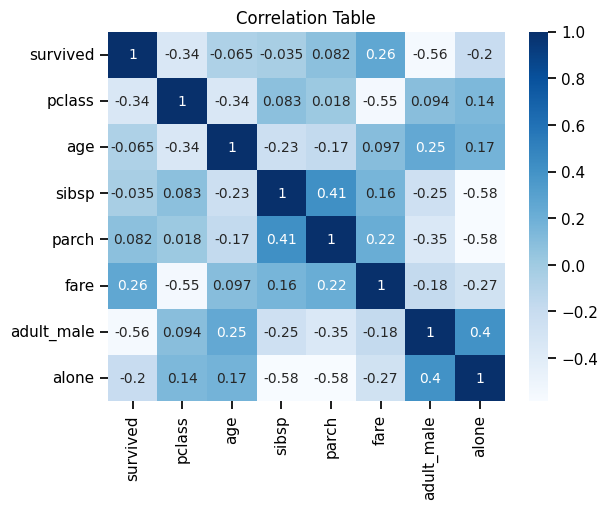

In [11]:
cor_mat = titanic_df.corr(numeric_only=True)
hmap = sns.heatmap(data=cor_mat,cmap='Blues', annot=True, annot_kws={'size':10}, cbar=True)
hmap.set_title('Correlation Table')

### Univariate Analysis:

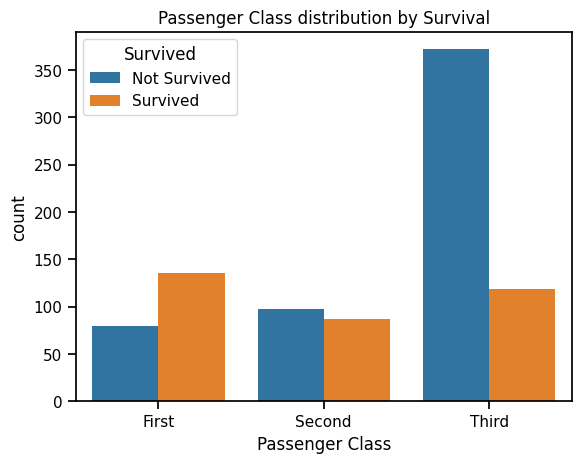

In [12]:
sns.countplot(data=titanic_df, x='class', hue='survived')
plt.title('Passenger Class distribution by Survival')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

High class passengers had higher rate of survival.
Though there are other factors at play too, such as age and sex.

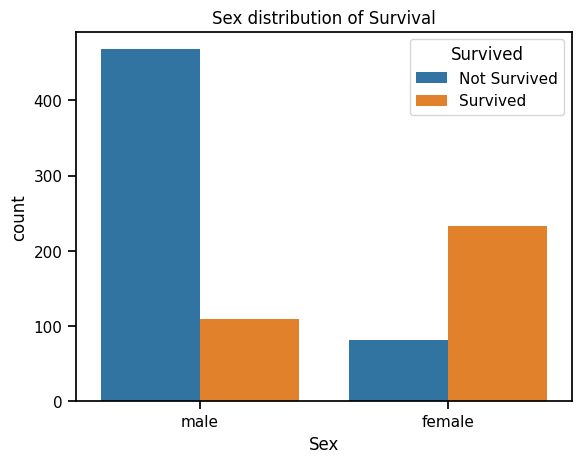

In [13]:
sns.countplot(data=titanic_df, x='sex', hue='survived')
plt.title('Sex distribution of Survival')
plt.xlabel('Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

As we mentioned earlier in the correlation analysis, due to the women and children first protocol, male survival is less compared to women.

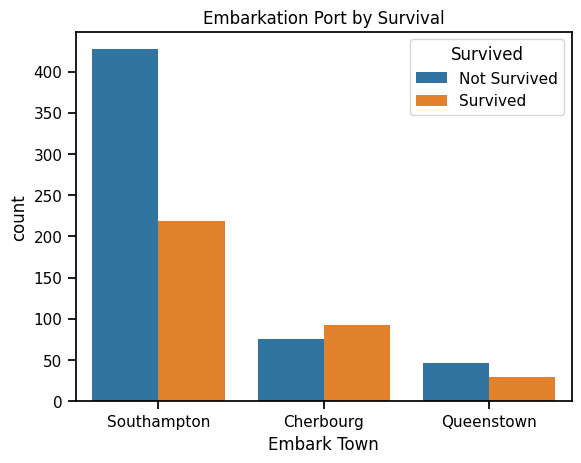

In [14]:
sns.countplot(data=titanic_df, x='embark_town', hue='survived')
plt.title('Embarkation Port by Survival')
plt.xlabel('Embark Town')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

The port you embarked doesn't influence your chance of survival, but you can see that the folks got on Cherbourg survived more. 

#### Numerical Features:

Text(0.5, 1.0, 'Age Distribution')

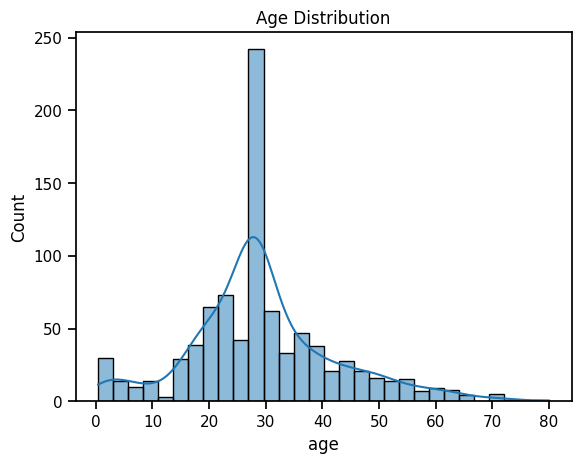

In [15]:
sns.histplot(data=titanic_df, x='age', kde=True, bins=30)
plt.title('Age Distribution')

Since, we imputed the median age to missing age values, you can see the spike of the median age.

Text(0.5, 1.0, 'Fare Distribution')

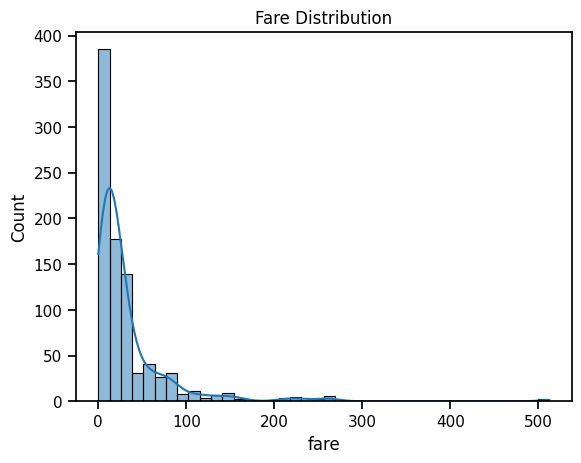

In [16]:
sns.histplot(data=titanic_df, x='fare', kde=True, bins=40)
plt.title('Fare Distribution')

Many people travelled in third class which is lower compared to others in terms of money.

That explains the positive skew on the graph.

### Bivariate Analysis:

Text(0.5, 1.0, 'Age Distribution by Survival')

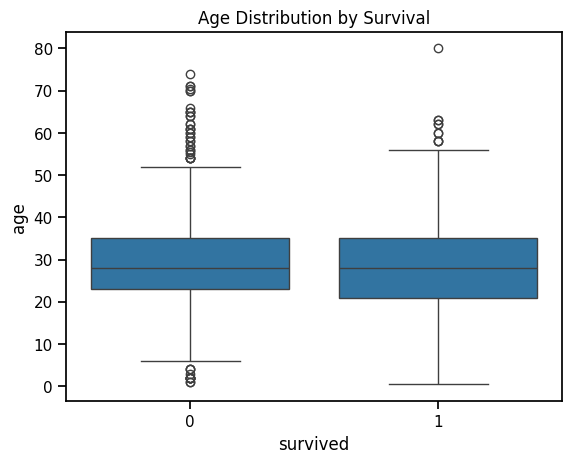

In [17]:
sns.boxplot(x='survived', y='age', data=titanic_df)
plt.title('Age Distribution by Survival')

We can see that many people from age 20 to 36 has survived and some outliers here which are some old folks above the age of 55 to 80.

The unfortunate people, who did not survive are generally from age 22 to 35, and again the outliers are here some children and many old folks. 

Text(0.5, 1.0, 'Fare Distribution by Survival')

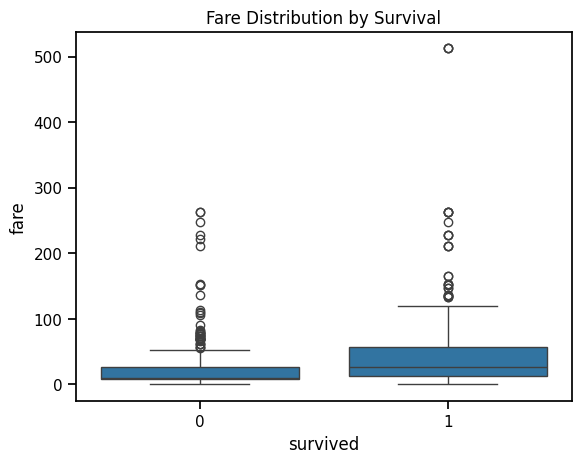

In [18]:
sns.boxplot(x='survived', y='fare', data=titanic_df)
plt.title('Fare Distribution by Survival')

As we saw in the fare distribution, many people bought tickets for less fare i.e third class tickets.

Since third class makes up more people, the survived and not survived generally contains that range from 0 to 100(Fare price).

The outliers are the First and Second class passengers, who survived and did not survive.

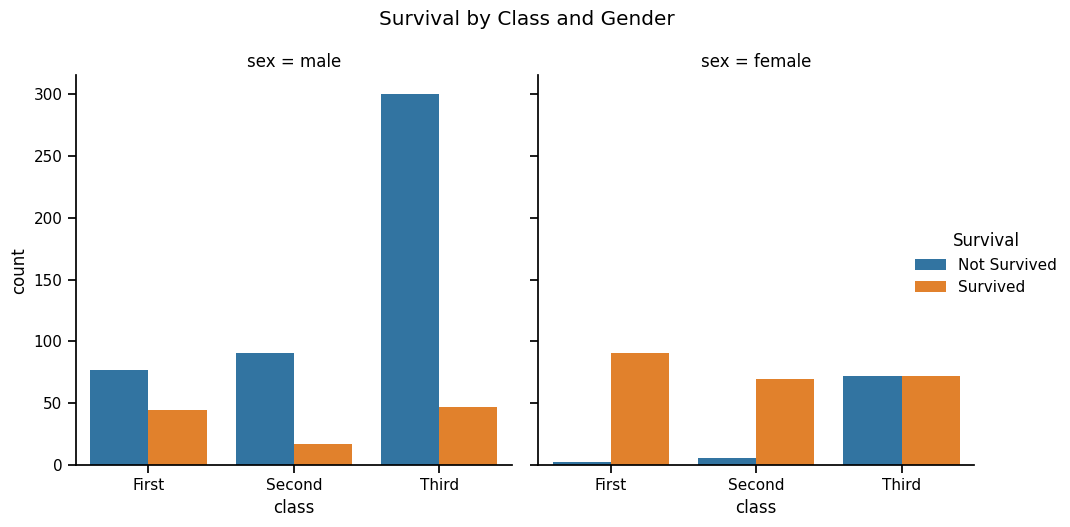

In [19]:
g=sns.catplot(x='class', hue='survived', col='sex', kind='count', data=titanic_df)
g.fig.suptitle('Survival by Class and Gender', y=1.05)
g._legend.set_title('Survival')
label=['Not Survived', 'Survived']
for t, l in zip(g._legend.texts, label):
    t.set_text(l)

In this category plot we compare the cases deeply, to see who survived.

You can see that in the male category, the survivors are less in numbers regardless of their Passenger Class, with high casualities in Third class.

On the Contrary, in the female category the survivors are high, with only third class female passengers did not make it compared to other classes.

<Axes: xlabel='class', ylabel='age'>

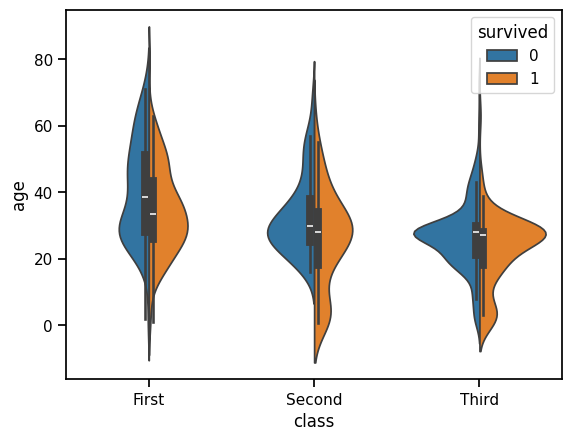

In [20]:
sns.violinplot(x='class', y='age', hue='survived', data=titanic_df, split=True)

Finally to compare the class, age of those who survived and not survived, we have the violin plot.

In conclusion this plot state the Class, age and sex does determine your chances of survival.

But in the end, it cannot fixate your survival.